### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data_df = pd.read_csv('../data/coupons.csv')

In [3]:
data_df.shape

(12684, 26)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data_df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [6]:
data_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [7]:
data_df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
#Exploring the age column to understand the values
data_df['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [9]:
#Exploring income column to understand the ranges
data_df['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
#Exploring the unique values in the car column to see if they provide any important contextual information
data_df['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [11]:
#Dropping column car from the dataset since 99% of the records don't have the value for this column. Also the values in the column do not provide any important contextual info which 
#can make a difference in the decision to accept or not the coupon
data_df = data_df.drop(columns='car')

In [12]:
data_df.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [13]:
# Exploring the probability distribution for values for CoffeeHouse column. 
coffee_probs = data_df['CoffeeHouse'].value_counts(normalize=True)
coffee_probs

CoffeeHouse
less1    0.271517
1~3      0.258683
never    0.237587
4~8      0.143098
gt8      0.089115
Name: proportion, dtype: float64

In [14]:
# Added a generic method to calculate the probablity of the column passed as an input  and dataframe and fill the missing values in the column using the probability disctribution calculated
def populate_missing_data_using_prob_dist(df, col_name):
  # Calculate probabilities of existing column values
  probs_col = df[col_name].value_counts(normalize=True)
  # Identify missing values
  missing_mask = df[col_name].isnull()
  # Sample from existing values using the calculated probabilities
  fill_values = np.random.choice(
      a=probs_col.index,
      size=missing_mask.sum(),
      p=probs_col.values
  )
  # Apply the sampled values
  df.loc[missing_mask, col_name] = fill_values


In [15]:
# Call the above function to fill missing values for Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 columns using the probablity distribution 
populate_missing_data_using_prob_dist(data_df,'Bar')
populate_missing_data_using_prob_dist(data_df,'CoffeeHouse')
populate_missing_data_using_prob_dist(data_df,'CarryAway')
populate_missing_data_using_prob_dist(data_df,'RestaurantLessThan20')
populate_missing_data_using_prob_dist(data_df,'Restaurant20To50')

In [16]:
# Checking none of the columns now has missing values
data_df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [17]:
# For the column age since it contains both the integer and the string values like below21 and 50plus and the column type is object, we need to convert the string values to integer and change
# the datatype of the column to int
data_df['age'] = data_df['age'].str.replace("50plus","50").str.replace("below21","20").astype(int)
data_df['age'].value_counts()

age
21    2653
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
20     547
Name: count, dtype: int64

In [18]:
# Added a method to parse the range string and return the tuple with Min and Max value from the range
import re
def parse_range_string(range_str):
    """
    Parses range strings including dollar signs into (min_val, max_val) tuples using regex.
    Returns numeric values (float/int) for unbounded limits (0.0, np.inf).
    """
    # Clean the string: remove dollar signs and convert to lowercase
    cleaned_str = str(range_str).lower().strip().replace('$', '').replace(',', '')

    # Case 1: Standard X-Y range (e.g., '10000-15000')
    # Regex checks for digits followed by a hyphen and more digits
    match_range = re.match(r'(\d+)\s*-\s*(\d+)', cleaned_str)
    if match_range:
        return float(match_range.group(1)), float(match_range.group(2))

    # Case 2: 'less than X' (e.g., 'less than 100')
    # Regex checks for 'less than' followed by digits
    match_less = re.match(r'less than\s*(\d+)', cleaned_str)
    if match_less:
        # Min is 0, Max is the upper bound
        return 0.0, float(match_less.group(1))

    # Case 3: 'X or more' (e.g., '500 or more')
    # Regex checks for digits followed by 'or more'
    match_more = re.match(r'(\d+)\s*or more', cleaned_str)
    if match_more:
        # Min is the lower bound, Max is effectively infinite
        return float(match_more.group(1)), np.inf

    # Default/Error case: return NaNs if no pattern matches
    return np.nan, np.nan

In [19]:
# For the income column need to generate two new columns providing the Min and he Max income as integer which we can use to do comparison
income_parsed_values = data_df['income'].apply(lambda x: pd.Series(parse_range_string(x), index=['Income_Min_Value','Income_Max_Value']))
data_df = pd.concat([data_df, income_parsed_values], axis=1)

In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  int64  
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  Bar                   12684 non-null  object 
 15  CoffeeHouse        

4. What proportion of the total observations chose to accept the coupon?



In [21]:
# Percentage of coupons accepted in the dataset
accept_coupon_count = data_df[data_df['Y'] == 1]['Y'].count()
total_observations = data_df.shape[0]
acceptance_ratio = accept_coupon_count / total_observations
print(acceptance_ratio*100)

56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

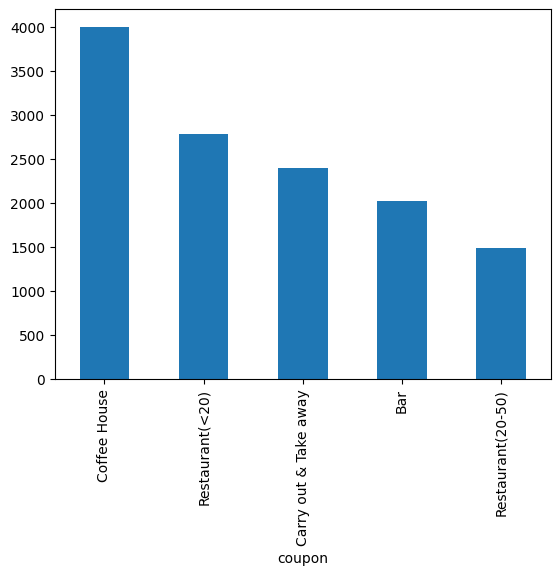

In [22]:
counts = data_df['coupon'].value_counts()
counts.plot(kind='bar')

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

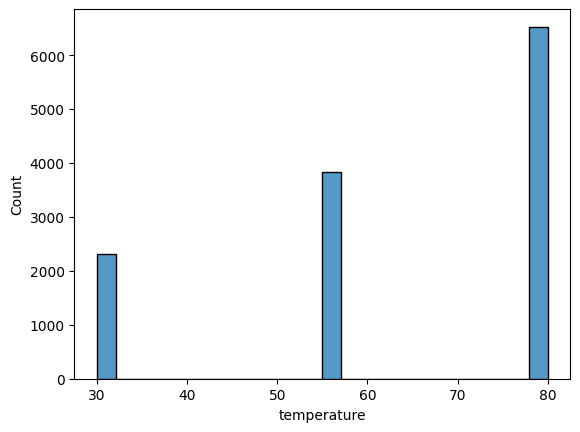

In [23]:
sns.histplot(data=data_df, x='temperature')

<Axes: xlabel='CoffeeHouse', ylabel='Count'>

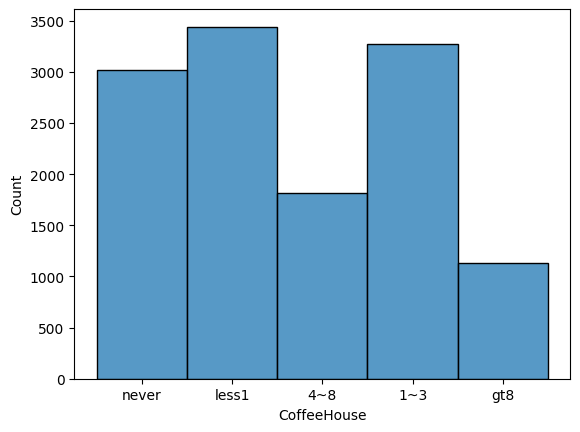

In [24]:
sns.histplot(data_df, x='CoffeeHouse')

<Axes: xlabel='Bar', ylabel='Count'>

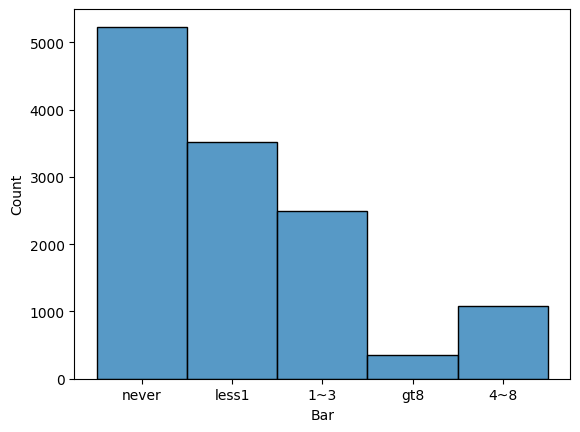

In [25]:
sns.histplot(data_df, x='Bar')

<Axes: xlabel='CarryAway', ylabel='Count'>

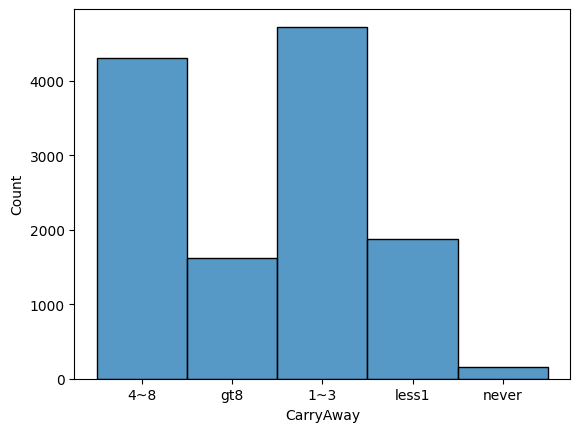

In [26]:
sns.histplot(data_df, x='CarryAway')

<Axes: xlabel='RestaurantLessThan20', ylabel='Count'>

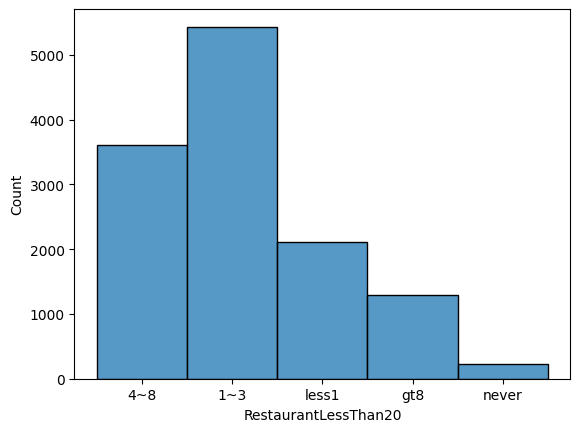

In [27]:
sns.histplot(data_df, x='RestaurantLessThan20')

<Axes: xlabel='Restaurant20To50', ylabel='Count'>

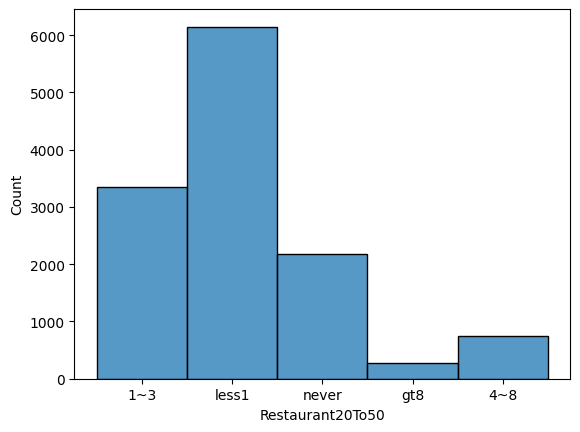

In [28]:
sns.histplot(data_df, x='Restaurant20To50')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

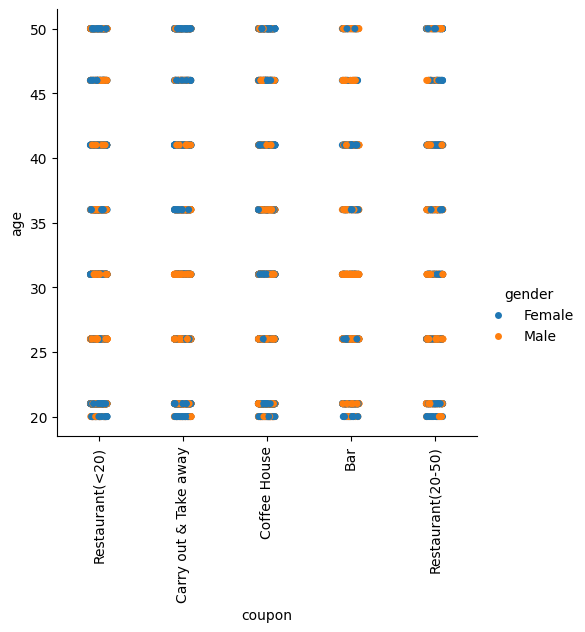

In [29]:
sns.catplot(data=data_df.query('Y==1'), x='coupon', y='age', hue='gender')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

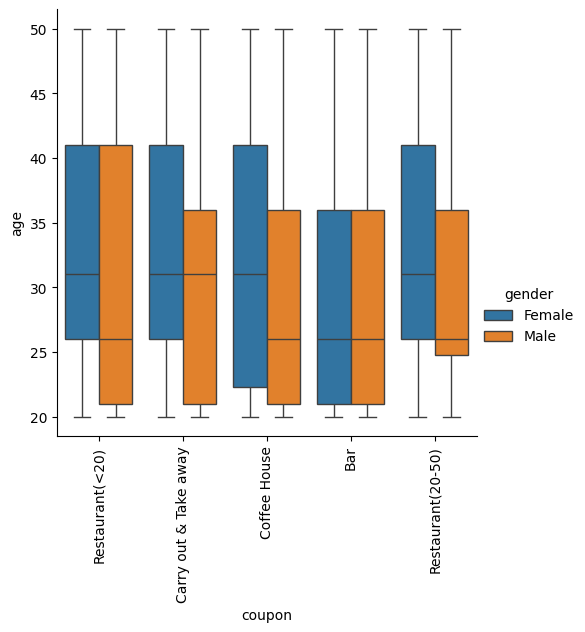

In [30]:
sns.catplot(data=data_df.query('Y==1'), x='coupon', y='age', hue='gender', kind='box')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

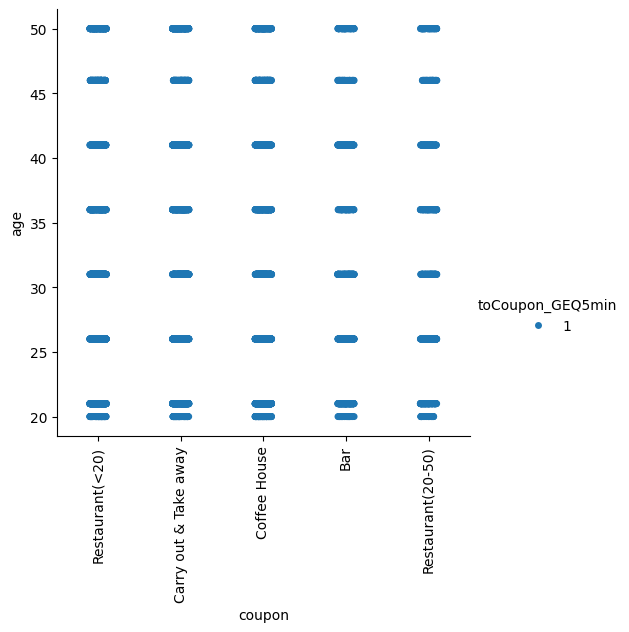

In [31]:
sns.catplot(data=data_df.query('Y==1'), x='coupon', y='age', hue='toCoupon_GEQ5min')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

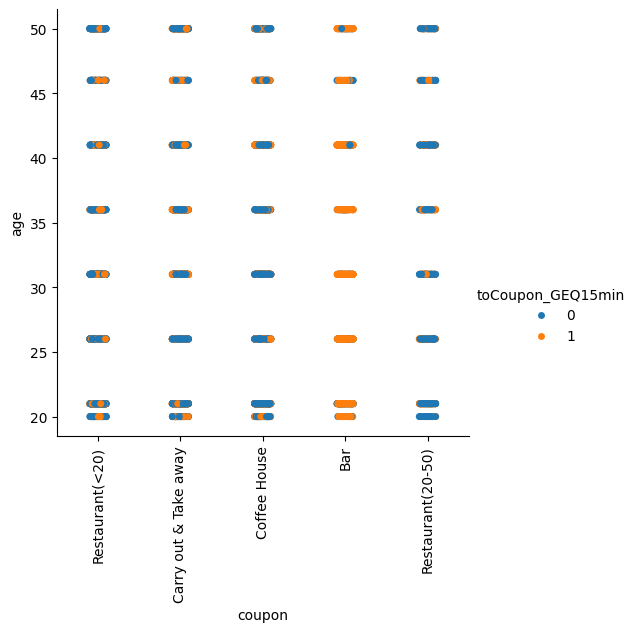

In [32]:
sns.catplot(data=data_df.query('Y==1'), x='coupon', y='age', hue='toCoupon_GEQ15min')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

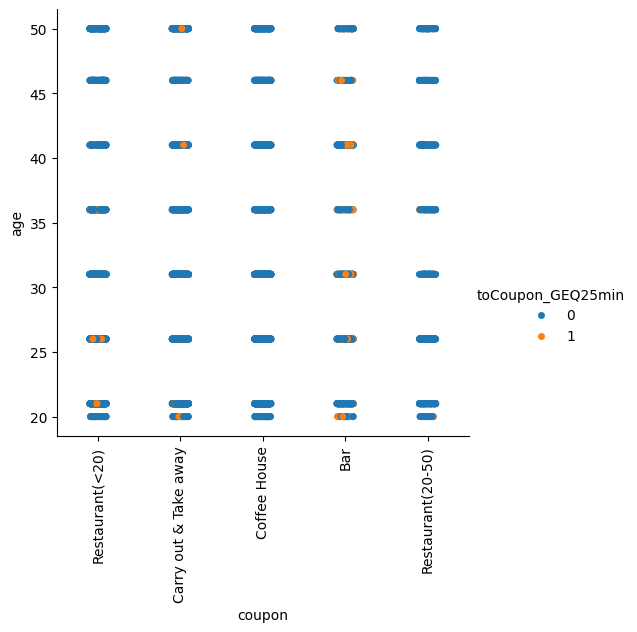

In [33]:
sns.catplot(data=data_df.query('Y==1'), x='coupon', y='age', hue='toCoupon_GEQ25min')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

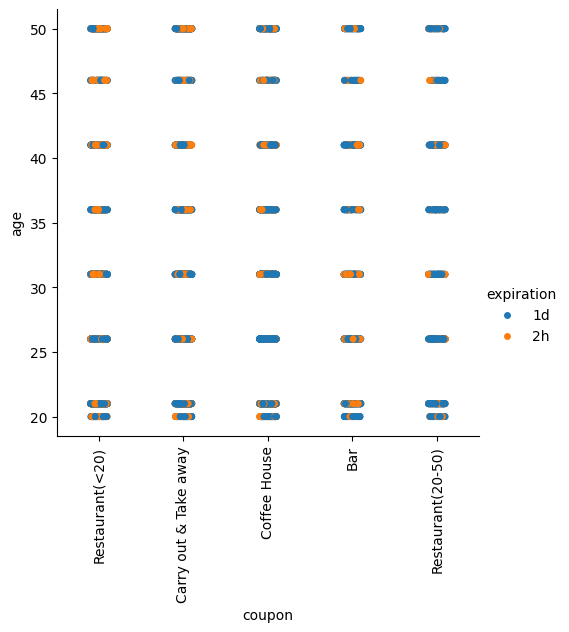

In [34]:
sns.catplot(data=data_df.query('Y==1'), x='coupon', y='age', hue='expiration')
plt.xticks(rotation=90)

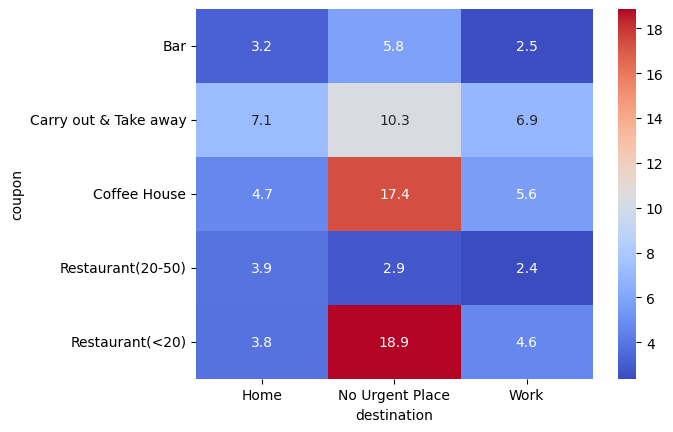

In [35]:
accept_df = data_df.query('Y==1')
ct = pd.crosstab(accept_df['coupon'], accept_df['destination'], normalize=True) * 100
sns.heatmap(ct, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

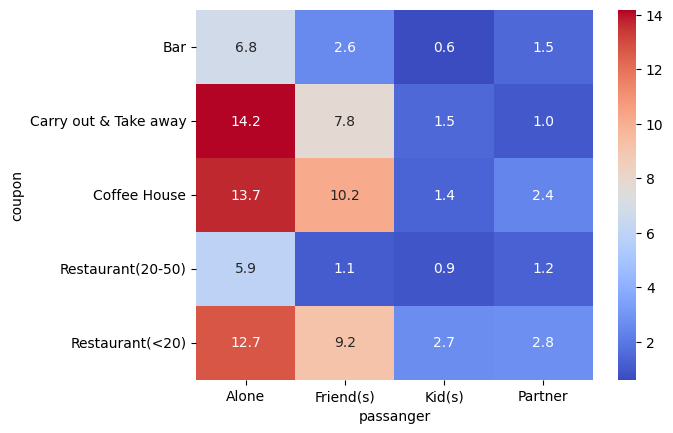

In [36]:
accept_df = data_df.query('Y==1')
ct = pd.crosstab(accept_df['coupon'], accept_df['passanger'], normalize=True) * 100
sns.heatmap(ct, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

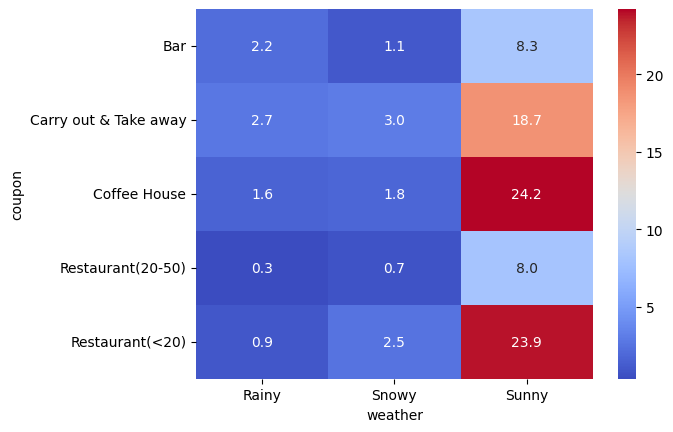

In [37]:
accept_df = data_df.query('Y==1')
ct = pd.crosstab(accept_df['coupon'], accept_df['weather'], normalize=True)*100
sns.heatmap(ct, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

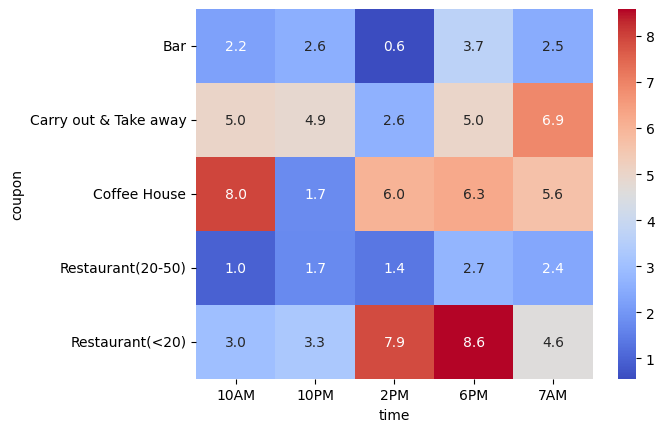

In [38]:
accept_df = data_df.query('Y==1')
ct = pd.crosstab(accept_df['coupon'], accept_df['time'], normalize=True)*100
sns.heatmap(ct, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  int64  
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  Bar                   12684 non-null  object 
 15  CoffeeHouse        

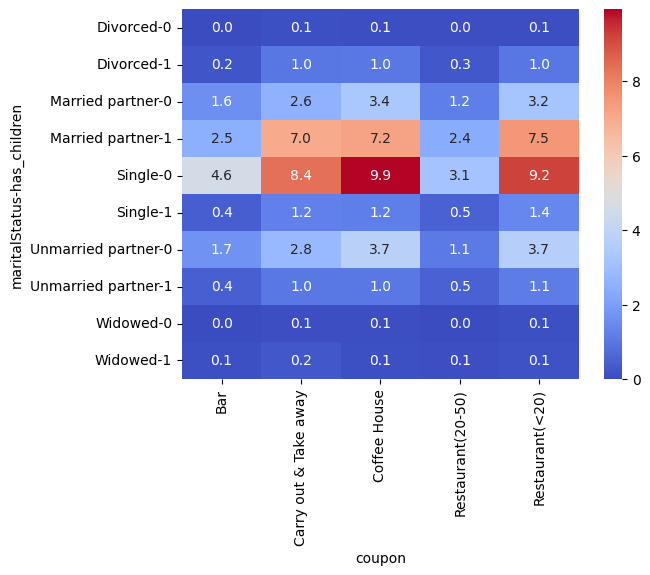

In [40]:
accept_df = data_df.query('Y==1')
ct = pd.crosstab([accept_df['maritalStatus'], accept_df['has_children']], accept_df['coupon'], normalize=True)*100
sns.heatmap(ct, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

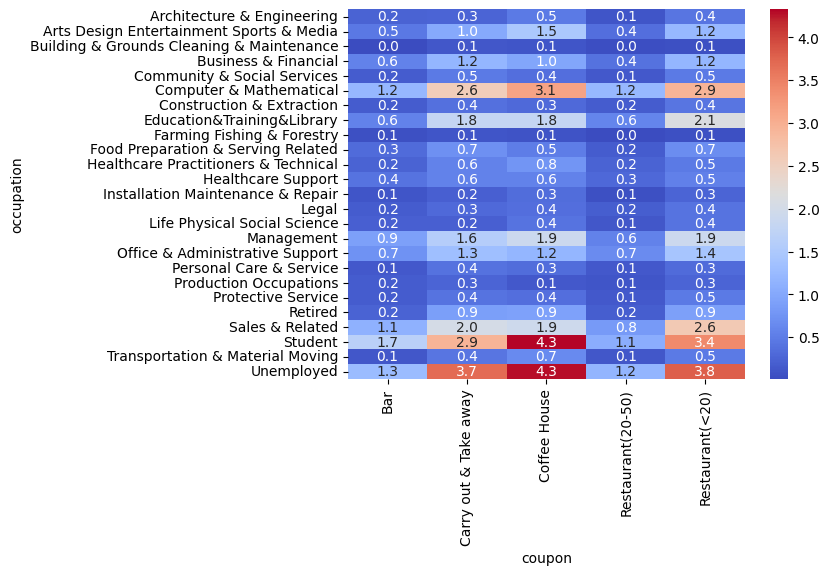

In [41]:
accept_df = data_df.query('Y==1')
ct = pd.crosstab(accept_df['occupation'], accept_df['coupon'], normalize=True)*100
sns.heatmap(ct, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

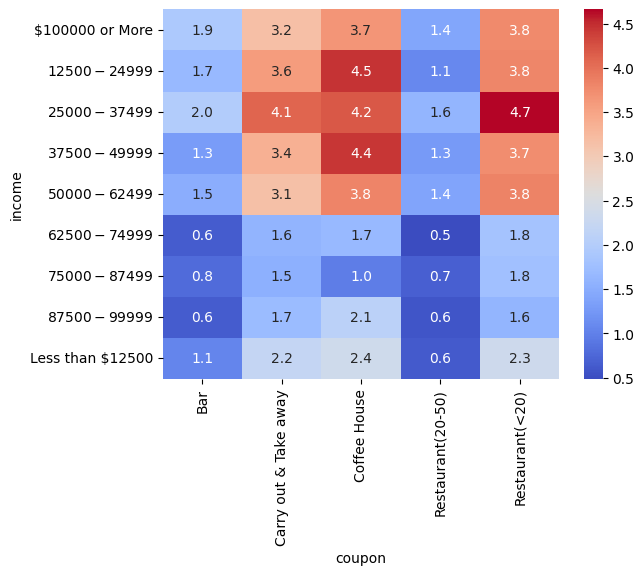

In [42]:
accept_df = data_df.query('Y==1')
ct = pd.crosstab(accept_df['income'], accept_df['coupon'], normalize=True)*100
sns.heatmap(ct, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

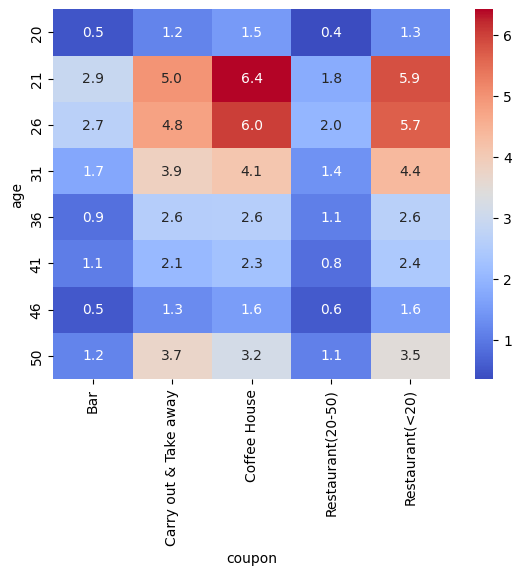

In [43]:
accept_df = data_df.query('Y==1')
ct = pd.crosstab(accept_df['age'], accept_df['coupon'], normalize=True)*100
sns.heatmap(ct, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

<Axes: >

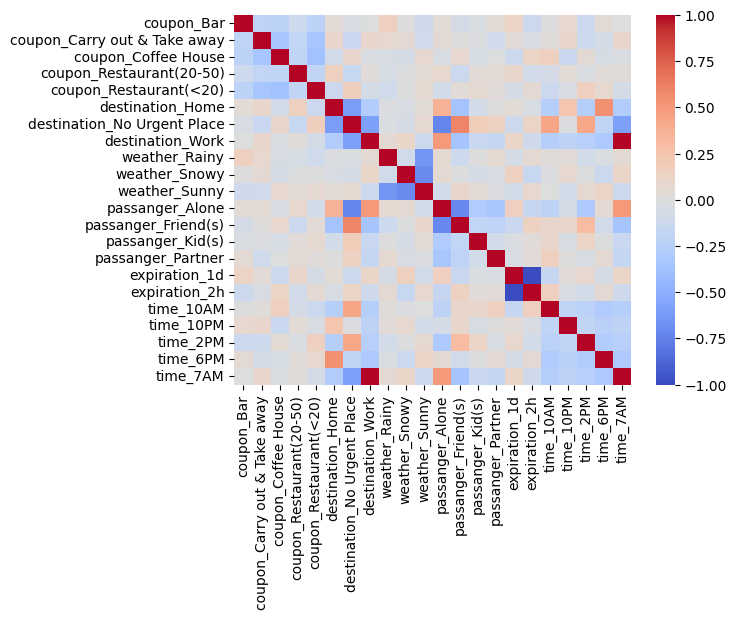

In [44]:
accept_df = data_df.query('Y==1')
df_encoded = pd.get_dummies(accept_df[["coupon", "destination", "weather", "passanger","expiration","time"]])
corr = df_encoded.corr()

sns.heatmap(corr, cmap="coolwarm")


In [45]:
# A generic funcion to calculate the acceptance percent for the passed dataframe based on Y column
def cal_accept_ratio(df):
  total = df.shape[0]
  accept = df[df['Y'] == 1]['Y'].count()
  ratio = accept / total
  return ratio * 100

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [54]:
# Investigating the Coffee House coupon for the insights
coffee_df = data_df.query('coupon == "Coffee House"')
coffee_df.shape

(3996, 27)

In [55]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           3996 non-null   object 
 1   passanger             3996 non-null   object 
 2   weather               3996 non-null   object 
 3   temperature           3996 non-null   int64  
 4   time                  3996 non-null   object 
 5   coupon                3996 non-null   object 
 6   expiration            3996 non-null   object 
 7   gender                3996 non-null   object 
 8   age                   3996 non-null   int64  
 9   maritalStatus         3996 non-null   object 
 10  has_children          3996 non-null   int64  
 11  education             3996 non-null   object 
 12  occupation            3996 non-null   object 
 13  income                3996 non-null   object 
 14  Bar                   3996 non-null   object 
 15  CoffeeHouse           399

In [56]:
coffee_df['CoffeeHouse'].value_counts()

CoffeeHouse
less1    1090
1~3      1059
never     949
4~8       547
gt8       351
Name: count, dtype: int64

<Axes: xlabel='CoffeeHouse', ylabel='Count'>

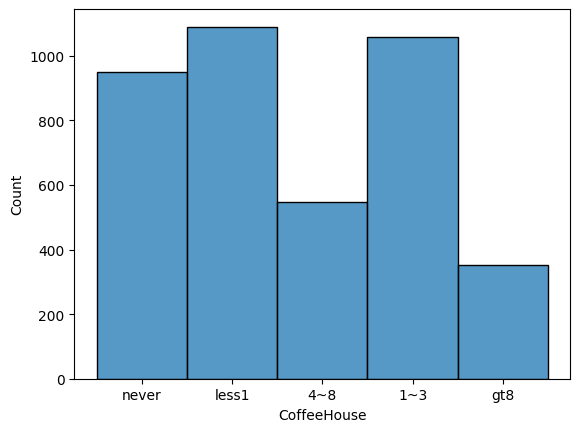

In [57]:
sns.histplot(coffee_df, x='CoffeeHouse')

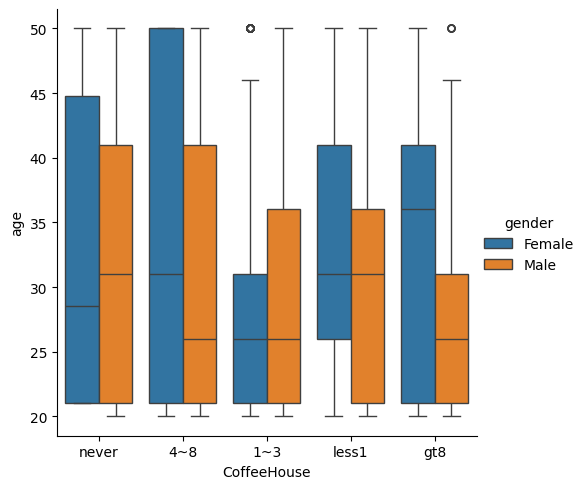

In [58]:
sns.catplot(data=coffee_df.query('Y == 1'), x='CoffeeHouse', y='age', kind='box', hue='gender')

In [59]:
#Overall Acceptance percent for coffee coupon
print("Overall Acceptance rate for Coffee house coupon is: ", cal_accept_ratio(coffee_df))

Overall Acceptance rate for Coffee house coupon is:  49.92492492492492


In [60]:
# Compare the acceptance rate between the people who go coffee house less than 4 times a month with others
coffee_cols_val_lst = coffee_df['CoffeeHouse'].value_counts().index.tolist()
coffee_cols_val_lst.remove('4~8')
coffee_cols_val_lst.remove('gt8')
coffee_cols_val_lst

cf_cond_less_4_df = coffee_df.query('CoffeeHouse in @coffee_cols_val_lst')
print("Percentage acceptance for less than 4 visit to Coffee house in a month: ", cal_accept_ratio(cf_cond_less_4_df))

cf_cond_4_above_df = coffee_df.query('CoffeeHouse not in @coffee_cols_val_lst')
print("Percentage acceptance for 4 and more visit to Coffee house in a month: ", cal_accept_ratio(cf_cond_4_above_df))



Percentage acceptance for less than 4 visit to Coffee house in a month:  44.99677211103938
Percentage acceptance for 4 and more visit to Coffee house in a month:  66.92650334075724


In [61]:
# Compare the acceptance rate between the direction to coupon when driving to Work or Home
cf_cols_val_lst = coffee_df['destination'].value_counts().index.tolist()
cf_cols_val_lst.remove('No Urgent Place')

cf_cond_1_df = coffee_df.query('destination in @cf_cols_val_lst and direction_same == 1')
print("Acceptance percentage for destination Work/Home and same direction to coupon", cal_accept_ratio(cf_cond_1_df))

cf_cond_2_df = coffee_df.query('destination in @cf_cols_val_lst and direction_opp == 1')
print("Acceptance percentage for destination Work/Home and opposite direction to coupon", cal_accept_ratio(cf_cond_2_df))




Acceptance percentage for destination Work/Home and same direction to coupon 53.06666666666666
Acceptance percentage for destination Work/Home and opposite direction to coupon 31.622364802933088


In [62]:
# Compare acceptance rate based on the distance to coupon and impact of age on the acceptance rate
cf_cond_1_df = coffee_df.query('toCoupon_GEQ5min == 1')
print("Acceptance percentage for drivers with distance to coupn 5 mins: ", cal_accept_ratio(cf_cond_1_df))

cf_cond_2_df = coffee_df.query('toCoupon_GEQ15min == 1')
print("Acceptance percentage for drivers with distance to coupn 15 mins: ", cal_accept_ratio(cf_cond_2_df))

cf_cond_3_df = coffee_df.query('toCoupon_GEQ25min == 1')
print("Acceptance percentage for drivers with distance to coupn 25 mins: ", cal_accept_ratio(cf_cond_3_df))

cf_cond_4_df = cf_cond_1_df.query('age > 30')
print("Acceptance percentage for drivers with distance to coupn 5 mins and age over 30: ", cal_accept_ratio(cf_cond_4_df))

cf_cond_5_df = cf_cond_1_df.query('age <= 30')
print("Acceptance percentage for drivers with distance to coupn 5 mins and age under 30: ", cal_accept_ratio(cf_cond_5_df))

cf_cond_6_df = cf_cond_2_df.query('age > 30')
print("Acceptance percentage for drivers with distance to coupn 15 mins and age over 30: ", cal_accept_ratio(cf_cond_6_df))

cf_cond_7_df = cf_cond_2_df.query('age <= 30')
print("Acceptance percentage for drivers with distance to coupn 15 mins and age under 30: ", cal_accept_ratio(cf_cond_7_df))

cf_cond_8_df = cf_cond_3_df.query('age > 30')
print("Acceptance percentage for drivers with distance to coupn 25 mins and age over 30: ", cal_accept_ratio(cf_cond_8_df))

cf_cond_9_df = cf_cond_3_df.query('age <= 30')
print("Acceptance percentage for drivers with distance to coupn 25 mins and age under 30: ", cal_accept_ratio(cf_cond_9_df))


Acceptance percentage for drivers with distance to coupn 5 mins:  49.92492492492492
Acceptance percentage for drivers with distance to coupn 15 mins:  45.393150024119635
Acceptance percentage for drivers with distance to coupn 25 mins:  34.516129032258064
Acceptance percentage for drivers with distance to coupn 5 mins and age over 30:  46.808510638297875
Acceptance percentage for drivers with distance to coupn 5 mins and age under 30:  53.42902711323764
Acceptance percentage for drivers with distance to coupn 15 mins and age over 30:  42.123585726718886
Acceptance percentage for drivers with distance to coupn 15 mins and age under 30:  49.458874458874455
Acceptance percentage for drivers with distance to coupn 25 mins and age over 30:  29.878048780487802
Acceptance percentage for drivers with distance to coupn 25 mins and age under 30:  39.726027397260275


In [63]:
# Compare acceptance rate based on the time of the day as morning and evening. Also study the impact of destination on the acceptance rate
cf_mr_cols_val = ['7AM','10AM']
cf_ev_cols_val = ['6PM','10PM']


cf_cond_1_df = coffee_df.query('time in  @cf_mr_cols_val')
print("Acceptance percentage for drivers in morning hours: ", cal_accept_ratio(cf_cond_1_df))

cf_cond_2_df = coffee_df.query('time in  @cf_ev_cols_val')
print("Acceptance percentage for drivers in evening hours: ", cal_accept_ratio(cf_cond_2_df))

cf_cond_3_df = cf_cond_1_df.query('destination == "Work"')
print("Acceptance percentage for drivers in morning hours going to work: ", cal_accept_ratio(cf_cond_3_df))

cf_cond_4_df = cf_cond_1_df.query('destination != "Work"')
print("Acceptance percentage for drivers in morning hours not going to work: ", cal_accept_ratio(cf_cond_4_df))

cf_cond_5_df = cf_cond_2_df.query('destination == "Home"')
print("Acceptance percentage for drivers in evening hours going to home: ", cal_accept_ratio(cf_cond_5_df))

cf_cond_6_df = cf_cond_2_df.query('destination == "No Urgent Place"')
print("Acceptance percentage for drivers in evening hours not going to home: ", cal_accept_ratio(cf_cond_6_df))

Acceptance percentage for drivers in morning hours:  54.24944812362031
Acceptance percentage for drivers in evening hours:  41.510791366906474
Acceptance percentage for drivers in morning hours going to work:  44.57831325301205
Acceptance percentage for drivers in morning hours not going to work:  64.07119021134594
Acceptance percentage for drivers in evening hours going to home:  36.206896551724135
Acceptance percentage for drivers in evening hours not going to home:  52.16450216450217


In [64]:
# Compare the acceptance rate based on the expiration of the coupon
cf_cond_1_df = coffee_df.query('expiration == "1d"')
print("Acceptance percentage for coupons with exipration as 1d: ", cal_accept_ratio(cf_cond_1_df))

cf_cond_2_df = coffee_df.query('expiration == "2h"')
print("Acceptance percentage for coupons with exipration as 2h: ", cal_accept_ratio(cf_cond_2_df))

Acceptance percentage for coupons with exipration as 1d:  58.394573205200686
Acceptance percentage for coupons with exipration as 2h:  43.19712617871576


In [65]:
# List of occupations with the acceptance rate above 50%
ct_df = coffee_df.groupby('occupation')['Y'].count()
sum_df = coffee_df.groupby('occupation')['Y'].sum()
ratio_df = sum_df / ct_df
ratio_df = ratio_df[ratio_df.apply(lambda x: x >= 0.5)]
ratio_df.sort_values(ascending = False)

occupation
Healthcare Practitioners & Technical         0.743243
Building & Grounds Cleaning & Maintenance    0.727273
Student                                      0.625251
Transportation & Material Moving             0.618421
Healthcare Support                           0.615385
Installation Maintenance & Repair            0.568182
Architecture & Engineering                   0.555556
Farming Fishing & Forestry                   0.545455
Unemployed                                   0.542105
Arts Design Entertainment Sports & Media     0.507177
Computer & Mathematical                      0.503341
Personal Care & Service                      0.500000
Name: Y, dtype: float64

In [66]:
# A generic function that takes the dataframe, column name and rate as input and return the list of values in the column for which the acceptance rate for
# the coupon is greater than rate provided in the input
# This function performs groupby on the input dataframe for the column provided as input and calculate the ratio based on column Y  to calculate the acceptance rate and then apply labda function to filter
# the values with acceptance rate that is above or equal to the rate provided in the input and return the values as a list
def get_lst_above_accpt_rate(df, colname, rate):
    ct_df = df.groupby(colname)['Y'].count()
    sum_df = df.groupby(colname)['Y'].sum()
    ratio_df = sum_df / ct_df
    ratio_df = ratio_df[ratio_df.apply(lambda x: x >= rate)]
    # print(ratio_df)
    result_list = ratio_df.sort_values(ascending = False).index.tolist()
    return result_list


In [67]:
# A combination of many columns selected basedon the observations from data visualizations and further investigation to see which columsn factors contribute the most to 
# increate the acceptance rate for the coffee house coupon. Since we find the overall rate of acceptance for Coffee House as 49.82%, we have tried in the below query to set the acceptance rate
# above 50% for the values of the different columns to be included in the query. For calculating the acceptance rate and getting the list of values to include in the query we are calling get_lst_above_accpt_rate function
dest_vals = get_lst_above_accpt_rate(coffee_df, 'destination', 0.5)
print("Destination values: ", dest_vals)
time_vals = get_lst_above_accpt_rate(coffee_df, 'time', 0.5)
print("Time values: ", time_vals)
visit_vals = get_lst_above_accpt_rate(coffee_df, 'CoffeeHouse', 0.5)
print("Visit values: ", visit_vals)
psng_vals =  get_lst_above_accpt_rate(coffee_df, 'passanger', 0.5)
print("Passanger values: ", psng_vals)
weather_vals =  get_lst_above_accpt_rate(coffee_df, 'weather', 0.5)
print("Weather values: ", weather_vals)
exp_vals =  get_lst_above_accpt_rate(coffee_df, 'expiration', 0.5)
print("Expiration values: ", exp_vals)
occup_vals = get_lst_above_accpt_rate(coffee_df, 'occupation', 0.5)
print("Occupation values: ", occup_vals)
cf_cond_df = coffee_df.query('destination in @dest_vals and passanger in @psng_vals and weather in @weather_vals and time in @time_vals and occupation in @occup_vals and CoffeeHouse in @visit_vals and expiration in @exp_vals')
print("Acceptance percentage: ", cal_accept_ratio(cf_cond_df))

Destination values:  ['No Urgent Place']
Time values:  ['10AM', '2PM']
Visit values:  ['4~8', 'gt8', '1~3']
Passanger values:  ['Friend(s)', 'Partner']
Weather values:  ['Rainy', 'Sunny']
Expiration values:  ['1d']
Occupation values:  ['Healthcare Practitioners & Technical', 'Building & Grounds Cleaning & Maintenance', 'Student', 'Transportation & Material Moving', 'Healthcare Support', 'Installation Maintenance & Repair', 'Architecture & Engineering', 'Farming Fishing & Forestry', 'Unemployed', 'Arts Design Entertainment Sports & Media', 'Computer & Mathematical', 'Personal Care & Service']
Acceptance percentage:  91.33858267716536


7.  Based on these observations, what do you hypothesize about drivers who accepted the Coffee House coupons?

In [ ]:
# Based on the Data Visualizations and Data Analysis performed above, we can hypothesize that the drivers most likely to accept CoffeeHouse coupon will be the ones
# - Who visit the CoffeeHouse at least once a month
# - Who are not going to any urgent place
# - With time of the day  in morning or afternoon (10am,2pm)
# - Have passengers as Friends or Partner
# - With weather conditions as Sunny or Rainy
# - Coupon has 1d validity
# - And they work in following occupations - ['Healthcare Practitioners & Technical', 'Building & Grounds Cleaning & Maintenance', 'Student', 'Transportation & Material Moving', 'Healthcare Support', 'Installation Maintenance & Repair', 'Architecture & Engineering', 'Farming Fishing & Forestry', 'Unemployed', 'Arts Design Entertainment Sports & Media', 'Computer & Mathematical', 'Personal Care & Service']

# When we combine all these conditions we see the acceptance rate of the CoffeeHouse coupon goes up to 91%.